In [24]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [116]:
k=int(input("Enter the no. of centers wanted in data:"))
data_x,data_y=make_blobs(n_samples=200,n_features=2,centers=k)

Enter the no. of centers wanted in data:6


In [117]:
print(data_x.shape)
print(data_y.shape)

(200, 2)
(200,)


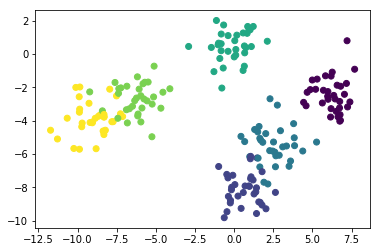

In [118]:
plt.scatter(data_x[:,0],data_x[:,1],c=data_y)

In [119]:
x_train,x_test,y_train,y_test=train_test_split(data_x,data_y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 2)
(40, 2)
(160,)
(40,)


In [122]:
def distance(p1,p2):
    return np.sqrt(((p1-p2)**2).sum())
def Kmean(x_train,centers=3,epochs=4):
    #Assigning the random centers
    rand_x=(2*np.random.rand(centers,)-1)*np.max(x_train[:,0])
    rand_y=(2*np.random.rand(centers,)-1)*np.max(x_train[:,1])
    rand_coord=[(rand_x[i],rand_y[i]) for i in range(rand_x.shape[0])]
    rand_coord=np.array(rand_coord)
    for k in range(epochs):# Specifies the no of times the centers have to be reinitialized
        #Initializing the dictionary for storing points for each center
        dict_points={}
        color  = ["green","red","blue","yellow","orange","violet"]
        for i in range(centers):
            cluster={'points':[],'color':color[i]}
            dict_points[i]=cluster
        #Assigning points to each center
        for i in range(x_train.shape[0]):
            dist=[]
            for j in range(centers):
                dist.append(distance(rand_coord[j],x_train[i]))
            dist=np.array(dist)
            dict_points[np.argmin(dist)]['points'].append(x_train[i])
        #reassigning the centers and plotting graphs
        for j in range(centers):
            if len(dict_points[j]['points'])!=0:
                rand_coord[j]=np.array(dict_points[j]['points']).mean(axis=0)
                #rand_coord[j]=((np.array(dict_points[j])[:,0].mean()),(np.array(dict_points[j])[:,1].mean()))
                if k==epochs-1:
                    plt.scatter(np.array(dict_points[j]['points'])[:,0],np.array(dict_points[j]['points'])[:,1],c=dict_points[j]['color'])
    return rand_coord,dict_points

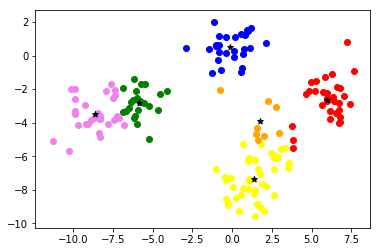

In [125]:
rand_coord,t=Kmean(x_train,k)
plt.scatter(rand_coord[:,0],rand_coord[:,1],color='black',marker="*")

In [126]:
for i in t.values():
    print(len(i['points']),i['color'])

22 green
31 red
27 blue
42 yellow
8 orange
30 violet
